# EDA : Lok Sabha Winners, 2019

## Extracting data

In [2]:
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from tabulate import tabulate


def inr_to_int(text):
    try:
        text = text.split()
        text = text[1].replace(",", "")
    except:
        return 0
    return int(text)



def main():
    header = ["Candidate",  "Constituency", "Party", "Criminal Cases", "Education", "Total Assets", "Liabilities"]
    data = []
    constituencies = 0
    try:
        url = "https://myneta.info/LokSabha2019/index.php?action=show_winners&sort=default"
        html = urlopen(url)
        soup = BeautifulSoup(html,'html.parser')
        title = soup.title.text
        title = title.split()
        title = title[4:-3]
        title = " ".join(title)
        title = title.title()
        title = title.split(":")
        constituency = "+".join(title)
        title = ",".join(title)
        table = soup.find('table',attrs={'style':'padding: 0px;'})
        rows = table.find_all('tr')
        for i in range(2, len(rows)):
            col_data = []
            cols = rows[i].find_all('td')
            for i in range(1, 6):
                col_data.append(cols[i].text)
            for i in range(6, 8):
                col_data.append(inr_to_int(cols[i].text)) 
            data.append(col_data)
            print("Saving", col_data[1], "=>", col_data[0], "("+col_data[2]+")")
            constituencies += 1
    except:
        print('ERROR')
    else:
        print('SUCCESS')
    df = pd.DataFrame(data = data, columns = header)
    print('Saved =>', constituencies, 'constituencies')
    df.to_csv('2019.csv', index=False)
    

main()

Saving ADILABAD => Bapu Rao Soyam (BJP)
Saving AGRA => Satyapal Singh Baghel (BJP)
Saving AHMEDABAD EAST => Patel Hasmukhbhai Somabhai (BJP)
Saving AHMEDABAD WEST => Dr. Solanki Kiritbhai (BJP)
Saving AHMEDNAGAR => Sujay Radhakrishna Vikhe (BJP)
Saving AJMER => Bhagirath Chaudhary (BJP)
Saving AKOLA => Sanjay Shamrao Dhotre (BJP)
Saving ALAPPUZHA => A M Ariff (CPI(M))
Saving ALATHUR => Ramya Haridas (INC)
Saving ALIGARH => Satish Kumar Gautam (BJP)
Saving ALIPURDUARS => John Barla (BJP)
Saving ALLAHABAD => Rita Bahuguna Joshi (BJP)
Saving ALMORA => Ajay Tamta (BJP)
Saving ALWAR => Mahant Balak Nath (BJP)
Saving AMALAPURAM => Chinta Anuradha (YSRCP)
Saving AMBALA => Rattan Lal Kataria (BJP)
Saving AMBEDKAR NAGAR => Ritesh Pandey (BSP)
Saving AMETHI => Smriti Irani (BJP)
Saving AMRAVATI => Navneet Ravi Rana (IND)
Saving AMRELI => Kachhadiya Naranbhai Bhikhabhai (BJP)
Saving AMRITSAR => Gurjeet Singh Aujla (INC)
Saving AMROHA => Kunwar Danish Ali (BSP)
Saving ANAKAPALLE => Dr.Beesetti Ven

Saving NANDED => Chikhalikar Pratap Govindrao (BJP)
Saving NANDURBAR => Heena Vijaykumar Gavit (BJP)
Saving NANDYAL => Pocha Brahmananda Reddy (YSRCP)
Saving NARASARAOPET => Lavu Sri Krishna Devarayalu (YSRCP)
Saving NARSAPURAM => Kanumuru Raghu Rama Krishna Raju (YSRCP)
Saving NASHIK => Hemant Tukaram Godse (SHS)
Saving NAVSARI => Patil Chandrakant (BJP)
Saving NAWADA => Chandan Singh (LJP)
Saving NAWGONG => Pradyut Bordoloi (INC)
Saving NELLORE => Adala Prabhakara Reddy (YSRCP)
Saving NEW DELHI => Meenakashi Lekhi (BJP)
Saving NILGIRIS => A. Raja (DMK)
Saving NIZAMABAD => Dharmapuri Arvind (BJP)
Saving NORTH EAST DELHI => Manoj Tiwari (BJP)
Saving NORTH GOA => Shripad Yesso Naik (BJP)
Saving NORTH WEST DELHI => Hans Raj Hans (BJP)
Saving ONGOLE => Magunta Sreenivasulu Reddy (YSRCP)
Saving OSMANABAD => Omprakash Bhupalsinh Alias Pavan Rajenimbalkar (SHS)
Saving OUTER MANIPUR => Lorho S. Pfoze (NPF)
Saving PALAKKAD => V K Sreekandan (INC)
Saving PALAMU => Vishnu Dayal Ram (BJP)
Saving 

## Visualizing data

In [3]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [4]:
data = pd.read_csv('2019.csv')
data

Candidate     Constituency Party  Criminal Cases  \
0                Bapu Rao Soyam         ADILABAD   BJP              52   
1         Satyapal Singh Baghel             AGRA   BJP               5   
2    Patel Hasmukhbhai Somabhai   AHMEDABAD EAST   BJP               0   
3         Dr. Solanki Kiritbhai   AHMEDABAD WEST   BJP               0   
4      Sujay Radhakrishna Vikhe       AHMEDNAGAR   BJP               0   
..                          ...              ...   ...             ...   
536  Ramdas Chandrabhanji Tadas           WARDHA   BJP               0   
537                Rahul Gandhi          WAYANAD   INC               5   
538         Parvesh Sahib Singh       WEST DELHI   BJP               0   
539   Bhavana Pundlikrao Gawali  YAVATMAL WASHIM   SHS               3   
540                   B.B.Patil        ZAHIRABAD   TRS              18   

         Education  Total Assets  Liabilities  
0        12th Pass       3099414       231450  
1        Doctorate      74274036      8606522  
2           Others      74699690      6252577  
3    Post Graduate      89474039            0  
4        Doctorate     168664576      2623964  
..             ...           ...          ...  
536      10th Pass      65807822      8961387  
537  Post Graduate     158877063      7201904  
538  Post Graduate     155195014     40097329  
539       Graduate      96873189      7396250  
540       Graduate    1287851556     11535000  

[541 rows x 7 columns]

In [5]:
data.describe()

Criminal Cases  Total Assets   Liabilities
count      541.000000  5.410000e+02  5.410000e+02
mean         1.916821  2.101618e+08  3.600881e+07
std          9.496711  5.261385e+08  1.420038e+08
min          0.000000  1.411790e+05  0.000000e+00
25%          0.000000  1.907652e+07  1.081480e+05
50%          0.000000  4.865272e+07  2.471613e+06
75%          2.000000  1.586511e+08  1.193580e+07
max        204.000000  6.601947e+09  1.547511e+09

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       541 non-null    object
 1   Constituency    541 non-null    object
 2   Party           541 non-null    object
 3   Criminal Cases  541 non-null    int64 
 4   Education       541 non-null    object
 5   Total Assets    541 non-null    int64 
 6   Liabilities     541 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 29.7+ KB


In [7]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

36

In [8]:
candidates = np.size(data["Candidate"])
candidates

541

In [9]:
candidates - np.size(data["Candidate"].unique())

0

In [10]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

0

In [11]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

0

In [12]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                                                    Education            
Nakul Nath                                                   Graduate                 6601946757
Vasanthakumar H                                              Post Graduate            4174930444
D.K. Suresh                                                  12th Pass                3388920717
Kanumuru Raghu Rama Krishna Raju                             Post Graduate            3259405378
Jayadev Galla                                                Graduate                 3051485242
Hema Malini Dharmendra Deol                                  Doctorate                2508270292
Malook Nagar                                                 Graduate                 2499628021
Adala Prabhakara Reddy                                       12th Pass                2211663364
Harsimrat Kaur Badal                                         10th Pass                2179919870
Sukhbir Singh Badal                         

In [13]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                                Education            
Vasanthakumar H                          Post Graduate            1547511439
Mala Rajya Laxmi Shah                    12th Pass                1350000000
Malook Nagar                             Graduate                 1016148176
Kanumuru Raghu Rama Krishna Raju         Post Graduate            1014467354
Harsimrat Kaur Badal                     10th Pass                 954852600
Sukhbir Singh Badal                      Post Graduate             954852600
Ranjeetsinha Hindurao Naik Nimbalkar     12th Pass                 896315287
Balashowry Vallabhaneni                  Post Graduate             746310844
Ajay Singh Dharmendra Deol (Sunny Deol)  Others                    534644785
D.K. Suresh                              12th Pass                 519320305
Srinivas Kesineni                        10th Pass                 512332955
Jugal Kishore                            10th Pass                 350040219
Gautam Gambhi

In [14]:
party_data = data[data["Party"].isin(["AAP","SAD","BSP","BJP","INC","IND","Republican Party of India (A)", "Punjab Lok Congress Party"])]
party_data.reset_index()
party_data

Candidate    Constituency Party  Criminal Cases  \
0                Bapu Rao Soyam        ADILABAD   BJP              52   
1         Satyapal Singh Baghel            AGRA   BJP               5   
2    Patel Hasmukhbhai Somabhai  AHMEDABAD EAST   BJP               0   
3         Dr. Solanki Kiritbhai  AHMEDABAD WEST   BJP               0   
4      Sujay Radhakrishna Vikhe      AHMEDNAGAR   BJP               0   
..                          ...             ...   ...             ...   
529           Ramakant Bhargava         VIDISHA   BJP               0   
532         Manickam Tagore, B.    VIRUDHUNAGAR   INC               1   
536  Ramdas Chandrabhanji Tadas          WARDHA   BJP               0   
537                Rahul Gandhi         WAYANAD   INC               5   
538         Parvesh Sahib Singh      WEST DELHI   BJP               0   

                 Education  Total Assets  Liabilities  
0                12th Pass       3099414       231450  
1                Doctorate      74274036      8606522  
2                   Others      74699690      6252577  
3            Post Graduate      89474039            0  
4                Doctorate     168664576      2623964  
..                     ...           ...          ...  
529              12th Pass      30032282      3332012  
532  Graduate Professional      49705799      3600203  
536              10th Pass      65807822      8961387  
537          Post Graduate     158877063      7201904  
538          Post Graduate     155195014     40097329  

[370 rows x 7 columns]

In [15]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorted

Candidate
Party           
BJP          301
INC           52
BSP           10
IND            4
SAD            2
AAP            1

<AxesSubplot:xlabel='Party'>

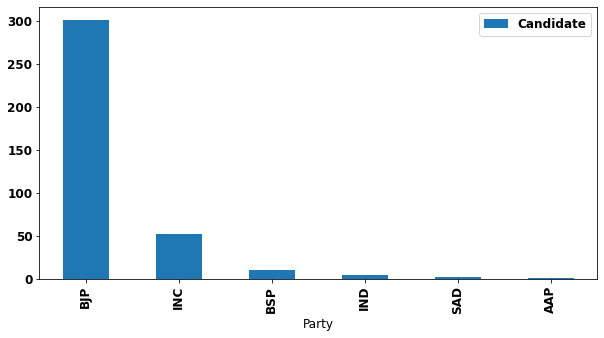

In [16]:
party_sorted.plot(kind="bar")

<AxesSubplot:xlabel='Education'>

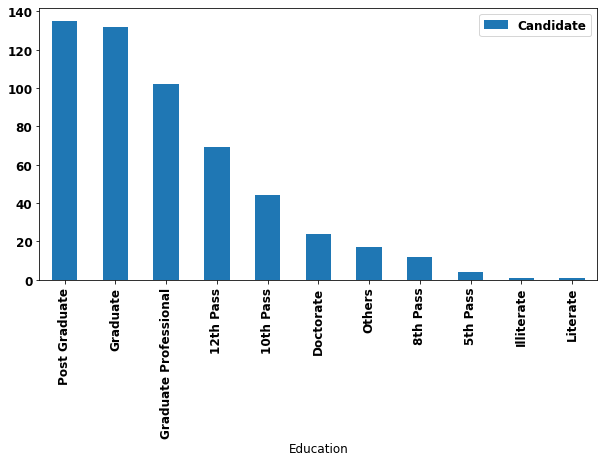

In [17]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [18]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

Candidate                           
Party                       AAP   BJP  BSP   INC  IND  SAD
Education                                                 
10th Pass                   0.0  23.0  0.0   2.0  2.0  1.0
12th Pass                   1.0  43.0  1.0   6.0  1.0  0.0
5th Pass                    0.0   2.0  0.0   1.0  0.0  0.0
8th Pass                    0.0   7.0  0.0   0.0  0.0  0.0
Doctorate                   0.0  15.0  0.0   3.0  0.0  0.0
Graduate                    0.0  65.0  5.0  12.0  1.0  0.0
Graduate Professional       0.0  57.0  2.0  12.0  0.0  0.0
Others                      0.0  11.0  0.0   2.0  0.0  0.0
Post Graduate               0.0  78.0  2.0  14.0  0.0  1.0

In [19]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

Candidate  Constituency Party  \
0                                      Dean Kuriakose        IDUKKI   INC   
1                                      Bapu Rao Soyam      ADILABAD   BJP   
2                               Anumula Revanth Reddy    MALKAJGIRI   INC   
3                                         Arjun Singh    BARRACKPUR   BJP   
4                                           B.B.Patil     ZAHIRABAD   TRS   
5                                   Dilip Kumar Ghosh     MEDINIPUR   BJP   
6                                   Locket Chatterjee       HOOGHLY   BJP   
7                           Komatireddy Venakat Reddy       BHONGIR   INC   
8                                    Atul Kumar Singh         GHOSI   BSP   
9                             Dr Ram Shankar Katheria        ETAWAH   BJP   
10                                      Subrat Pathak       KANNAUJ   BJP   
11                                Sri Nisith Pramanik   COOCH BEHAR   BJP   
12                                 Mohammad Azam Khan        RAMPUR    SP   
13                              Gopal Chinnaya Shetty  MUMBAI NORTH   BJP   
14                                         John Barla   ALIPURDUARS   BJP   
15                              Rajan Baburao Vichare         THANE   SHS   
16                                Karti P Chidambaram     SIVAGANGA   INC   
17                                    Shantanu Thakur       BANGAON   BJP   
18  Bhonsle Shrimant Chhatrapati Udayanraje Pratap...        SATARA   NCP   
19                             Adhir Ranjan Chowdhury    BAHARAMPUR   INC   
20                             Pratap Chandra Sarangi      BALASORE   BJP   
21                                      Adoor Prakash      ATTINGAL   INC   
22                                       Malook Nagar        BIJNOR   BSP   
23                                          Hibi Eden     ERNAKULAM   INC   
24                                     V K Sreekandan      PALAKKAD   INC   

                Education  Criminal Cases  
0           Post Graduate             204  
1               12th Pass              52  
2                Graduate              42  
3               10th Pass              24  
4                Graduate              18  
5               10th Pass              14  
6                Graduate              14  
7               12th Pass              14  
8                Graduate              13  
9               Doctorate              12  
10               Graduate              11  
11               8th Pass              11  
12  Graduate Professional              10  
13               5th Pass               9  
14               8th Pass               9  
15              12th Pass               9  
16  Graduate Professional               8  
17               Graduate               8  
18              12th Pass               8  
19              10th Pass               7  
20               Graduate               7  
21  Graduate Professional               7  
22               Graduate               7  
23               Graduate               7  
24               Graduate               7

In [20]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

Candidate   Constituency  \
0                         Kripanath Mallah      KARIMGANJ   
1                   Bholanath (B.P. Saroj)   MACHHLISHAHR   
2                            Rajnath Singh        LUCKNOW   
3                         Sudarshan Bhagat      LOHARDAGA   
4               Sudhakar Tukaram Shrangare          LATUR   
5                            Sangeeta Azad        LALGANJ   
6                            Pradan Baruah      LAKHIMPUR   
7                              Nayab Singh    KURUKSHETRA   
8                         Dr Sanjeev Kumar        KURNOOL   
9                             Mahua Moitra   KRISHNANAGAR   
10                            Venkatesan S        MADURAI   
11                      Thomas Chazhikadan       KOTTAYAM   
12                  Saptagiri Sankar Ulaka        KORAPUT   
13              Sanjay Sadashivrao Mandlik       KOLHAPUR   
14                          Annapurna Devi        KODARMA   
15                             Arjun Munda         KHUNTI   
16                        Chauhan Devusinh          KHEDA   
17              Gajendra Umrao Singh Patel       KHARGONE   
18  Nandkumar Singh Chouhan (Nandu Bhaiya)        KHANDWA   
19                      Vishnu Datt Sharma      KHAJURAHO   
20                       Jasbir Singh Gill  KHADOOR SAHIB   
21                          Jyotsna Mahant          KORBA   
22                         Chandrani Murmu       KEONJHAR   
23                         Chunni Lal Sahu     MAHASAMUND   
24                Shardaben Anilbhai Patel       MAHESANA   

                  Party              Education  Criminal Cases  
0                   BJP               Graduate               0  
1                   BJP               Graduate               0  
2                   BJP          Post Graduate               0  
3                   BJP               Graduate               0  
4                   BJP              10th Pass               0  
5                   BSP  Graduate Professional               0  
6                   BJP              12th Pass               0  
7                   BJP  Graduate Professional               0  
8                 YSRCP          Post Graduate               0  
9                  AITC               Graduate               0  
10               CPI(M)              12th Pass               0  
11  Kerala Congress (M)  Graduate Professional               0  
12                  INC  Graduate Professional               0  
13                  SHS          Post Graduate               0  
14                  BJP          Post Graduate               0  
15                  BJP              12th Pass               0  
16                  BJP                 Others               0  
17                  BJP  Graduate Professional               0  
18                  BJP          Post Graduate               0  
19                  BJP          Post Graduate               0  
20                  INC                 Others               0  
21                  INC          Post Graduate               0  
22                  BJD  Graduate Professional               0  
23                  BJP               Graduate               0  
24                  BJP              12th Pass               0

<AxesSubplot:xlabel='Party'>

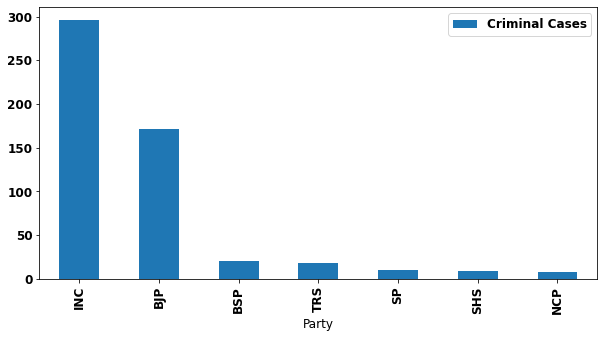

In [21]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [22]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

Candidate         Constituency  \
0                                          Nakul Nath           CHHINDWARA   
1                                     Vasanthakumar H        KANNIYAKUMARI   
2                                         D.K. Suresh      BANGALORE RURAL   
3                    Kanumuru Raghu Rama Krishna Raju           NARSAPURAM   
4                                       Jayadev Galla               GUNTUR   
5                         Hema Malini Dharmendra Deol              MATHURA   
6                                        Malook Nagar               BIJNOR   
7                              Adala Prabhakara Reddy              NELLORE   
8                                Harsimrat Kaur Badal             BATHINDA   
9                                 Sukhbir Singh Badal             FIROZPUR   
10                                M V V Satyanarayana        VISAKHAPATNAM   
11  Bhonsle Shrimant Chhatrapati Udayanraje Pratap...               SATARA   
12                              Mala Rajya Laxmi Shah        TEHRI GARHWAL   
13                            Dr.Gaddam Ranjith Reddy             CHEVELLA   
14                                     Gautam Gambhir           EAST DELHI   
15                              Supriya Sadanand Sule             BARAMATI   
16                                          B.B.Patil            ZAHIRABAD   
17               Ranjeetsinha Hindurao Naik Nimbalkar                MADHA   
18                              Kotha Prabhakar Reddy                MEDAK   
19                                      Anurag Sharma               JHANSI   
20                           Sukhbir Singh Jaunapuria  TONK SAWAI MADHOPUR   
21                                       Pinaki Misra                 PURI   
22                                    B.N.Bache Gowda        CHIKKBALLAPUR   
23                                 S. Jagathrakshakan            ARAKKONAM   
24                                   Nama Nageswr Rao              KHAMMAM   

    Party  Total Assets  
0     INC    6601946757  
1     INC    4174930444  
2     INC    3388920717  
3   YSRCP    3259405378  
4     TDP    3051485242  
5     BJP    2508270292  
6     BSP    2499628021  
7   YSRCP    2211663364  
8     SAD    2179919870  
9     SAD    2179919870  
10  YSRCP    2023905124  
11    NCP    1996813173  
12    BJP    1846640100  
13    TRS    1634695131  
14    BJP    1471587789  
15    NCP    1408888704  
16    TRS    1287851556  
17    BJP    1275160578  
18    TRS    1266581773  
19    BJP    1243060113  
20    BJP    1233802420  
21    BJD    1174701344  
22    BJP    1153501141  
23    DMK    1146984897  
24    TRS    1074671341

<AxesSubplot:xlabel='Party'>

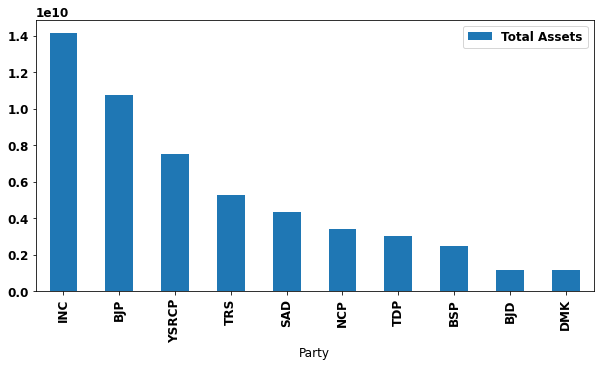

In [23]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 